In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
import cv2
import pandas as pd
import random
import ntpath
import os



In [12]:
datadir = 'Data'
columns = ['center','left','right','steering','throttle','reverse','speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth', -1)
data.head()

C:\Users\alexm\AppData\Local\Temp/ipykernel_22352/2854318360.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,center,left,right,steering,throttle,reverse,speed
0,D:\Programming Projects\Self-Driving_Project\IMG\center_2021_08_05_15_07_56_776.jpg,D:\Programming Projects\Self-Driving_Project\IMG\left_2021_08_05_15_07_56_776.jpg,D:\Programming Projects\Self-Driving_Project\IMG\right_2021_08_05_15_07_56_776.jpg,0.0,0.0,0.0,0.000024
1,D:\Programming Projects\Self-Driving_Project\IMG\center_2021_08_05_15_07_56_850.jpg,D:\Programming Projects\Self-Driving_Project\IMG\left_2021_08_05_15_07_56_850.jpg,D:\Programming Projects\Self-Driving_Project\IMG\right_2021_08_05_15_07_56_850.jpg,0.0,0.0,0.0,0.000024
2,D:\Programming Projects\Self-Driving_Project\IMG\center_2021_08_05_15_07_56_925.jpg,D:\Programming Projects\Self-Driving_Project\IMG\left_2021_08_05_15_07_56_925.jpg,D:\Programming Projects\Self-Driving_Project\IMG\right_2021_08_05_15_07_56_925.jpg,0.0,0.0,0.0,0.000024
3,D:\Programming Projects\Self-Driving_Project\IMG\center_2021_08_05_15_07_57_000.jpg,D:\Programming Projects\Self-Driving_Project\IMG\left_2021_08_05_15_07_57_000.jpg,D:\Programming Projects\Self-Driving_Project\IMG\right_2021_08_05_15_07_57_000.jpg,0.0,0.0,0.0,0.000024
4,D:\Programming Projects\Self-Driving_Project\IMG\center_2021_08_05_15_07_57_075.jpg,D:\Programming Projects\Self-Driving_Project\IMG\left_2021_08_05_15_07_57_075.jpg,D:\Programming Projects\Self-Driving_Project\IMG\right_2021_08_05_15_07_57_075.jpg,0.0,0.0,0.0,0.000024


In [15]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2021_08_05_15_07_56_776.jpg,left_2021_08_05_15_07_56_776.jpg,right_2021_08_05_15_07_56_776.jpg,0.0,0.0,0.0,0.000024
1,center_2021_08_05_15_07_56_850.jpg,left_2021_08_05_15_07_56_850.jpg,right_2021_08_05_15_07_56_850.jpg,0.0,0.0,0.0,0.000024
2,center_2021_08_05_15_07_56_925.jpg,left_2021_08_05_15_07_56_925.jpg,right_2021_08_05_15_07_56_925.jpg,0.0,0.0,0.0,0.000024
3,center_2021_08_05_15_07_57_000.jpg,left_2021_08_05_15_07_57_000.jpg,right_2021_08_05_15_07_57_000.jpg,0.0,0.0,0.0,0.000024
4,center_2021_08_05_15_07_57_075.jpg,left_2021_08_05_15_07_57_075.jpg,right_2021_08_05_15_07_57_075.jpg,0.0,0.0,0.0,0.000024


[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


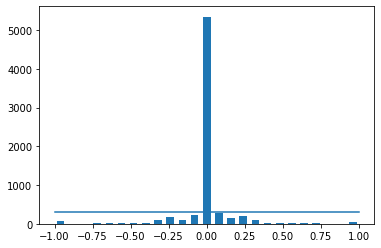

In [27]:
num_bins = 25
samples_per_bin = 350
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:])*0.5
print(center)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])), (samples_per_bin,samples_per_bin))
plt.show()